## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Import all the necessary modules
import pandas as pd

#Importing numpy
import numpy as np

#Importing ploting libraries
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#To encode categorical features & feature scalling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

#Logistic Regression Library 
from sklearn.linear_model import LogisticRegression

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings('ignore')

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [71]:
students_df = pd.read_csv("students-data.csv",delimiter=';')
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [72]:
students_df_copy = students_df
students_df_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [58]:
students_df.index.name='number'
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [74]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [75]:
students_df.select_dtypes(exclude=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
school        395 non-null object
sex           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
dtypes: object(17)
memory usage: 52.5+ KB


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [76]:
var = students_df.var()
var

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [77]:
for columns in students_df.select_dtypes(exclude=['object']).columns:
    if np.var(students_df[columns])<1:
        students_df.drop([columns],axis=1, inplace=True)

In [9]:
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [78]:
 from sklearn import preprocessing
cat_attr = students_df.select_dtypes(include=['object']).columns
cat_attr


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [81]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 

for x in cat_attr:
    students_df[x]= label_encoder.fit_transform(students_df[x]) 
students_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

In [82]:
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [83]:
students_df['G1'] = np.where( ( (students_df['G1'] >= 10) ), 1, 0)
students_df['G2'] = np.where( ( (students_df['G2'] >= 10) ), 1, 0)
students_df['G3'] = np.where( ( (students_df['G3'] >= 10) ), 1, 0)

students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [84]:
X= students_df.drop(labels ='G3',axis=1)
X.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [85]:
Y = students_df['G3']
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int32

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

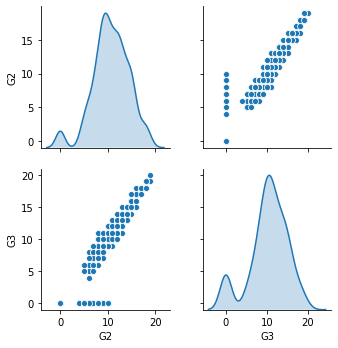

In [73]:
x=students_df_copy[['G2','G3']]
sns.pairplot(x,diag_kind='kde')



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

C:\Users\arupm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


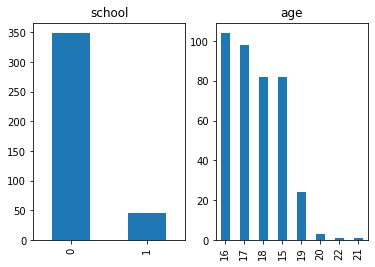

In [86]:
categorical_features = ["school", "age"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(students_df[categorical_features]):
    students_df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

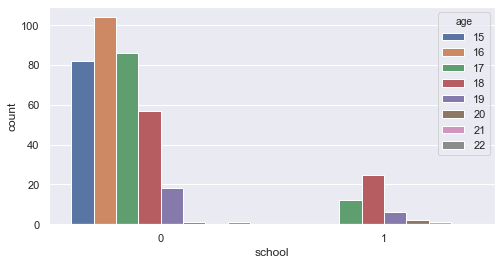

In [130]:
sns.countplot(x='school',data=students_df,hue='age')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [90]:
X = students_df.drop(labels = "G3", axis = 1)
Y = students_df['G3']
X=np.array(X)
Y=np.array(Y)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [91]:

test_size = 0.25 # taking 75:25 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [99]:
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)
print("Training score :",regression_model.score(X_train,y_train))

Training score : 0.9121621621621622


C:\Users\arupm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
Y_predict = regression_model.predict(X_test)
print("Testing score :",regression_model.score(X_test,y_test))

Testing score : 0.9393939393939394


# Naive bayes with Iris data

### Import Iris.csv

In [27]:
#Import all the necessary modules
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt   
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
#To encode categorical features & feature scalling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings('ignore')

In [33]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#Let us first understand the values stored into categorical features
for column in iris_df.select_dtypes(include=['object']).columns:

    print("FEATURE NAME & VALUES = %s - %s"%(column, iris_df[column].unique()))

FEATURE NAME & VALUES = Class - ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [34]:
# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
iris_df = iris_df.apply(le.fit_transform)
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [39]:
X= iris_df.drop(labels='Class',axis=1)

print(X.shape)

(150, 4)


In [40]:
y=iris_df['Class']
print(y.shape)

(150,)


### Find the distribution of target variable (Class)

In [41]:
iris_df.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### Plot the distribution of target variable using histogram

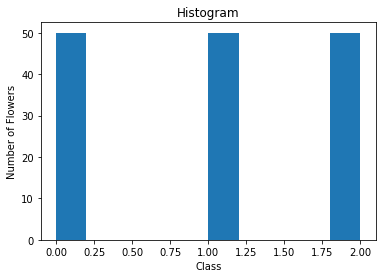

In [42]:
iris_df["Class"].plot.hist()
plt.xlabel("Class") 
plt.ylabel("Number of Flowers")
plt.title("Histogram")
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257D9889CF8>,
      dtype=object)

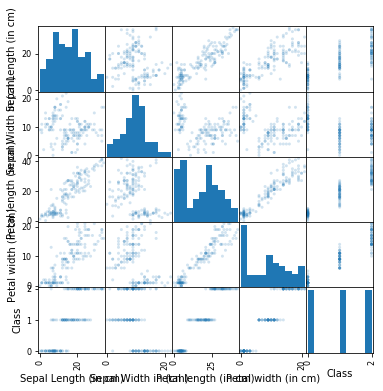

In [43]:
scatter_matrix(iris_df, alpha=0.2, figsize=(6, 6))

### Summary Statistics and explain insights for at least 2 variables

In [44]:
iris_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,15.386667,8.175743,0.0,8.0,15.0,21.0,34.0
Sepal Width in (cm),150.0,9.540000,4.300195,0.0,7.0,9.0,12.0,22.0
Petal length (in cm),150.0,18.200000,11.648660,0.0,6.0,19.5,27.0,42.0
Petal width (in cm),150.0,8.986667,6.405730,0.0,2.0,9.0,14.0,21.0
Class,150.0,1.000000,0.819232,0.0,0.0,1.0,2.0,2.0


## Summary Statistics - 
1. "Sepal Width in (cm)" has very close mean and median with low standard deviation hence expected to have normal distribution.
2. "Petal length (in cm)" has far away mean and median with higher standard deviation hence expected to have skewed distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257D98A14E0>,
      dtype=object)

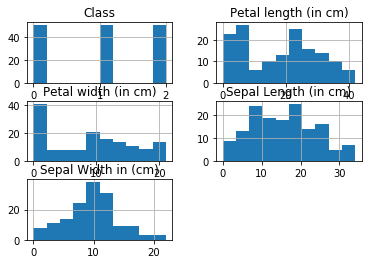

In [45]:
iris_df.hist()

### Correlation among all variables and give your insights

In [46]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.115744,0.897970,0.818592,0.785590
Sepal Width in (cm),-0.115744,1.000000,-0.305776,-0.294547,-0.421028
Petal length (in cm),0.897970,-0.305776,1.000000,0.944711,0.938885
Petal width (in cm),0.818592,-0.294547,0.944711,1.000000,0.947668
Class,0.785590,-0.421028,0.938885,0.947668,1.000000


#### , Petal length and petal width have strong relation in identifying the class.

### Split data in Training and Validation in 80:20

In [47]:
X= iris_df.drop(labels='Class',axis=1)
y = iris_df['Class']
X=np.array(X)
Y=np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


### Do Feature Scaling

In [48]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Train R^2
print("Training Score :",regression_model.score(x_train, y_train))

Training Score : 0.9370725756337535


In [63]:
# Test R^2
print("Test Score :",regression_model.score(x_test, y_test))

Test Score : 0.9250445568741844


In [51]:
regression_model.coef_

array([-0.01744358, -0.02468016,  0.04194884,  0.06316019])

In [52]:
regression_model.intercept_

0.17711245722797597

In [53]:
# Train MSE
predictedClass = regression_model.predict(x_train)
print(mean_squared_error(predictedClass, y_train))

0.043415552852684634


In [54]:
# Test MSE
predictedClass = regression_model.predict(x_test)
print(mean_squared_error(predictedClass, y_test))

0.04039265546224505


### Train and Fit NaiveBayes Model

In [56]:
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_pred = gnb.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [58]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 96.66666666666667


In [61]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


###  The result is telling us that we have 11 out of 11 i.e. 100% correct prediction for Class 0 (Iris-setosa), 12 out of 13 correct prediction for Class 1 (Iris-versicolor) and 6 out of 6 correct prediction for Class 2 (Iris-virginica)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

